<a href="https://colab.research.google.com/github/Chaitanyachafle/Loantap_logistic_Regression_casestudy/blob/main/Loan_tab_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/drive/MyDrive/logistic_regression.csv")

In [7]:
# Making an copy of dataset
loantap=df.copy()
loantap.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Exploratory of Data Analysis



In [8]:
loantap.shape

(396030, 27)

In [9]:
#data info
loantap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [10]:
#Checking Null values
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [11]:
# percentage of null values in each colum
round(loantap.isnull().sum()/len(loantap)* 100,3)

loan_amnt               0.000
term                    0.000
int_rate                0.000
installment             0.000
grade                   0.000
sub_grade               0.000
emp_title               5.789
emp_length              4.621
home_ownership          0.000
annual_inc              0.000
verification_status     0.000
issue_d                 0.000
loan_status             0.000
purpose                 0.000
title                   0.443
dti                     0.000
earliest_cr_line        0.000
open_acc                0.000
pub_rec                 0.000
revol_bal               0.000
revol_util              0.070
total_acc               0.000
initial_list_status     0.000
application_type        0.000
mort_acc                9.543
pub_rec_bankruptcies    0.135
address                 0.000
dtype: float64

**Analysizing Basic Metrics**

In [12]:
loantap.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Insights
**Outlier**: The significant difference between mean and median and Standard deviation indicate key attribute like loan amount,annual inc,revol_bal has outlier.
**Loan Duration Preference**: A preference for 36-month loan terms among borrowers suggests a balance between manageable installments.

**Home Ownership Trends**: The prevalence of applicants with mortgaged homes suggests financial stability or a need for substantial, property-secured loans.

**Successful Loan Repayment**: Most loans being fully paid off reflects positively on borrowers' financial commitment, indicating effective lending criteria.

**Debt Consolidation Dominance**: The primary use of loans for debt consolidation highlights a common strategy to manage or reduce high-interest debt.

**Individual Borrowers**: The predominance of individual applicants suggests that personal loans are a major market segment.

**Application Type**:Almost all applications are from individuals, with very few joint applications.

In [13]:
#separating float and object columns
n_column=loantap.select_dtypes('float64').columns.tolist()
n_column

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [14]:
n_categorical=['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

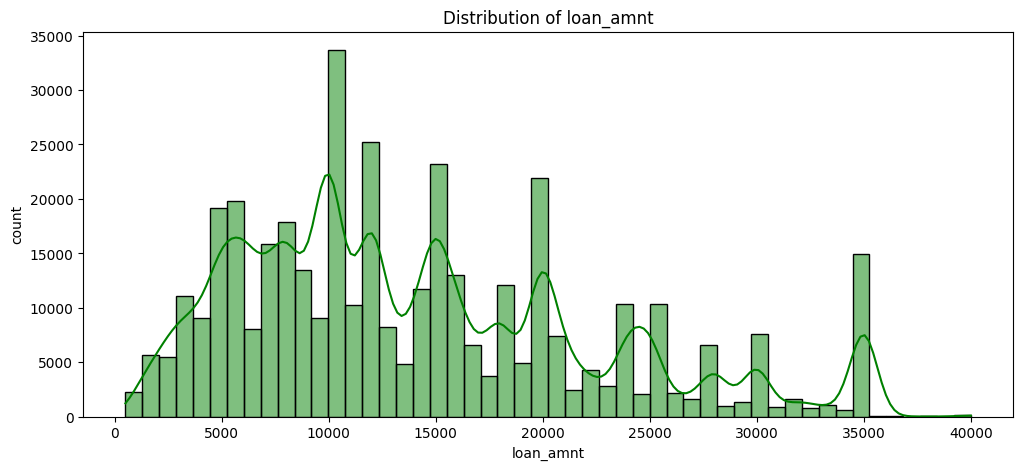

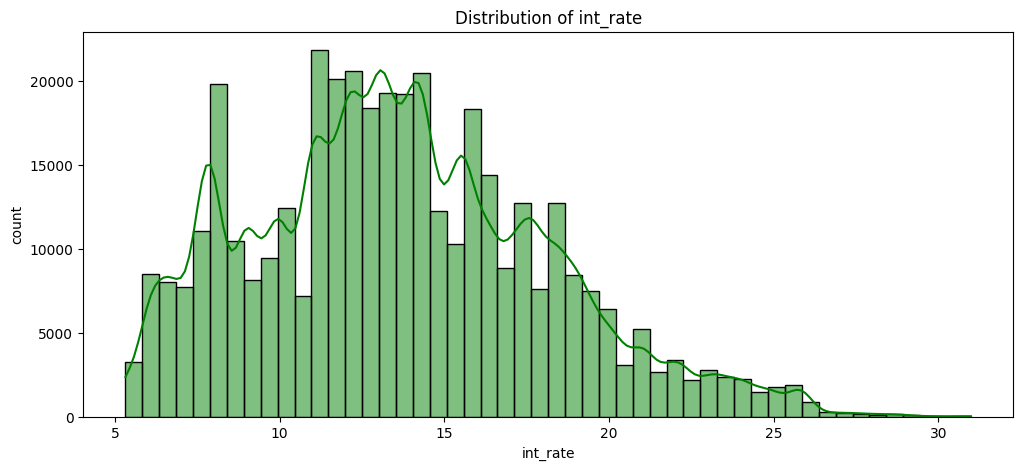

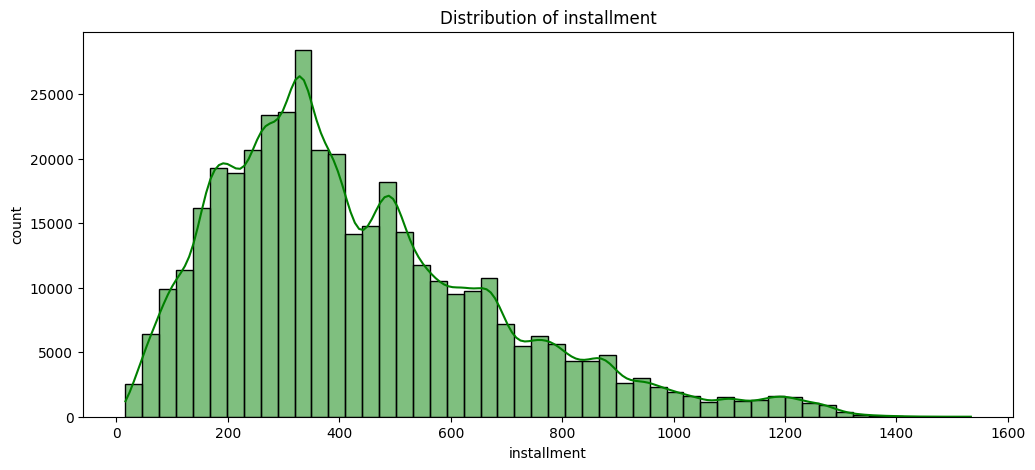

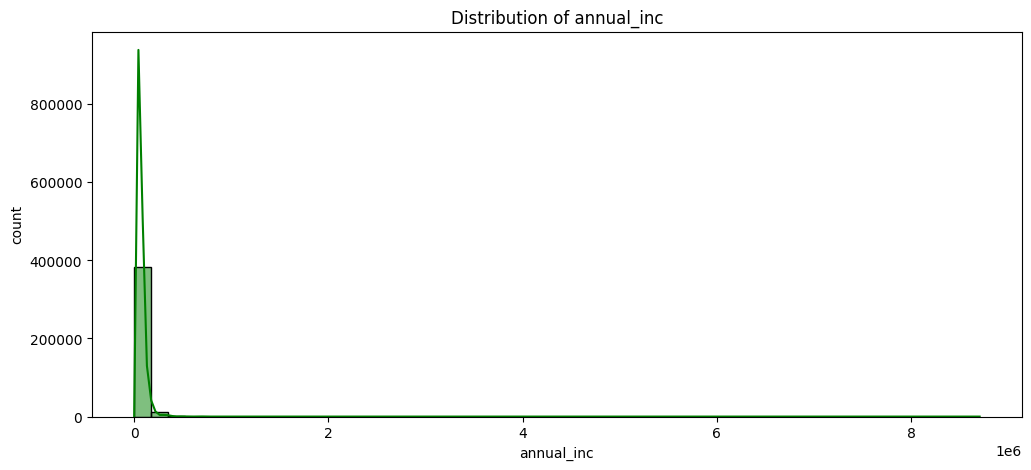

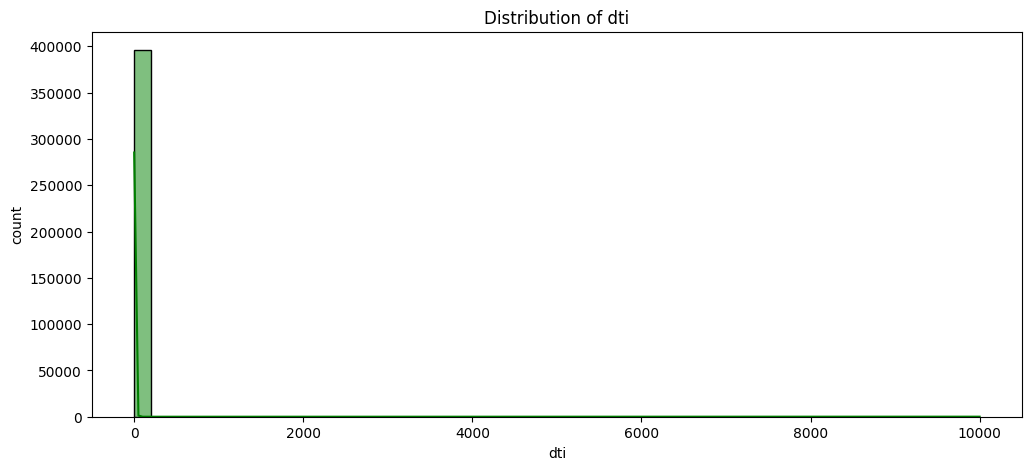

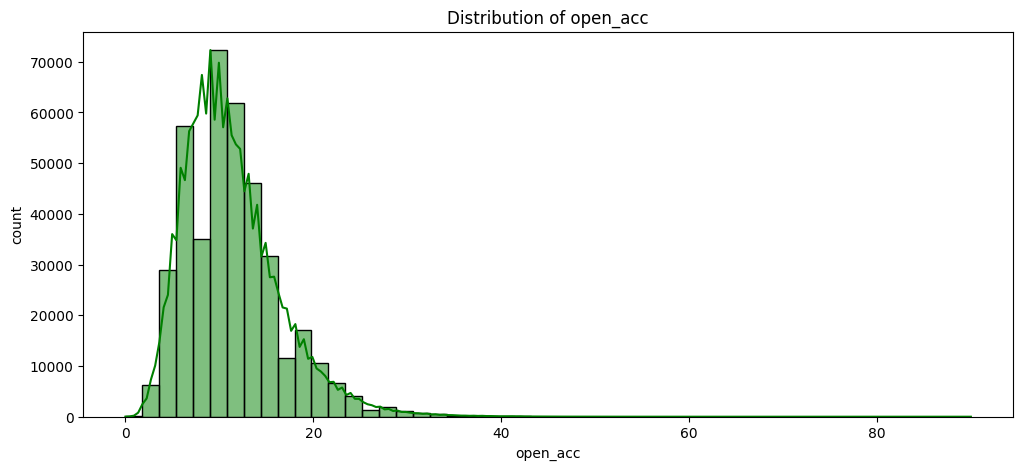

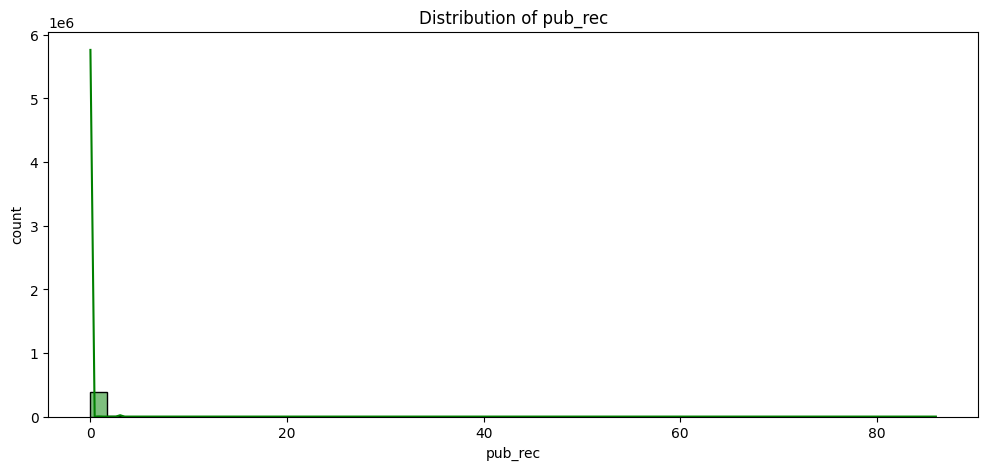

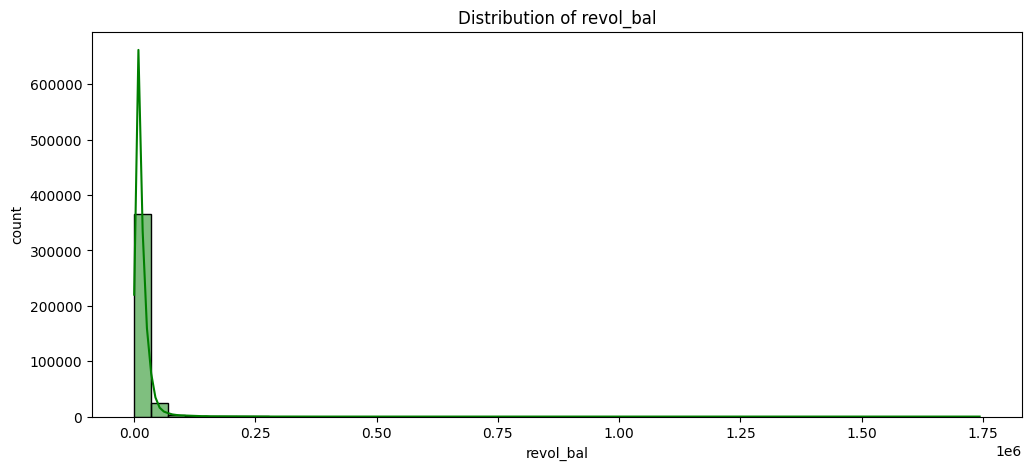

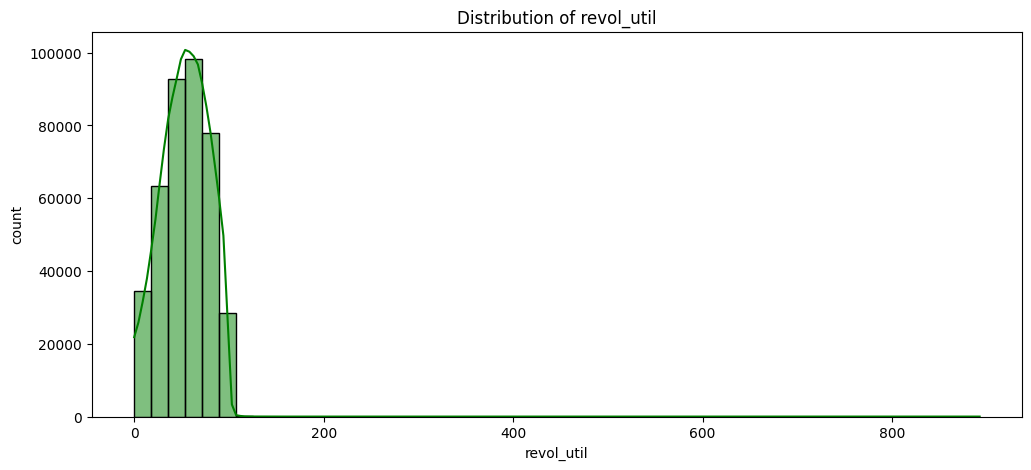

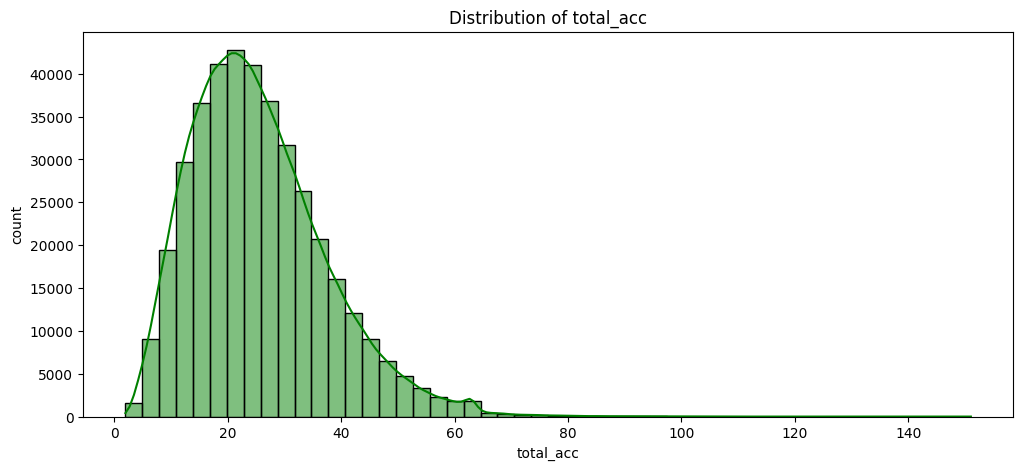

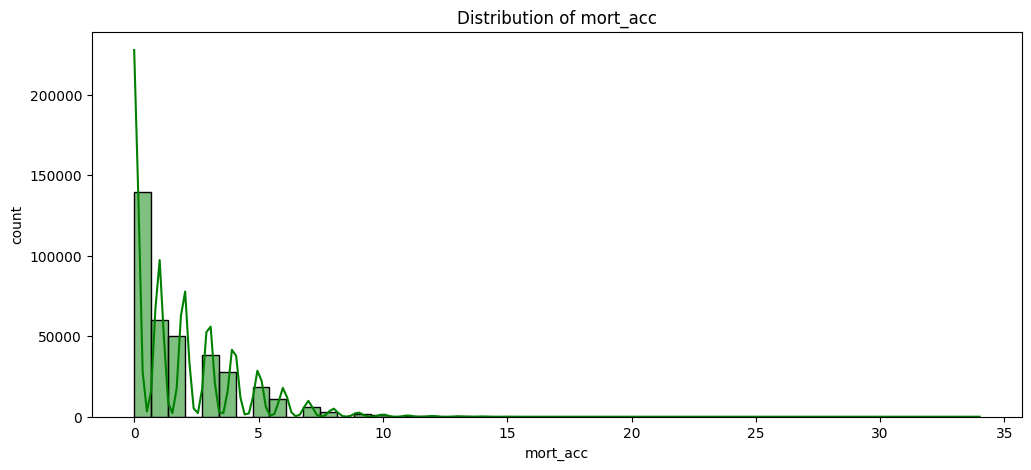

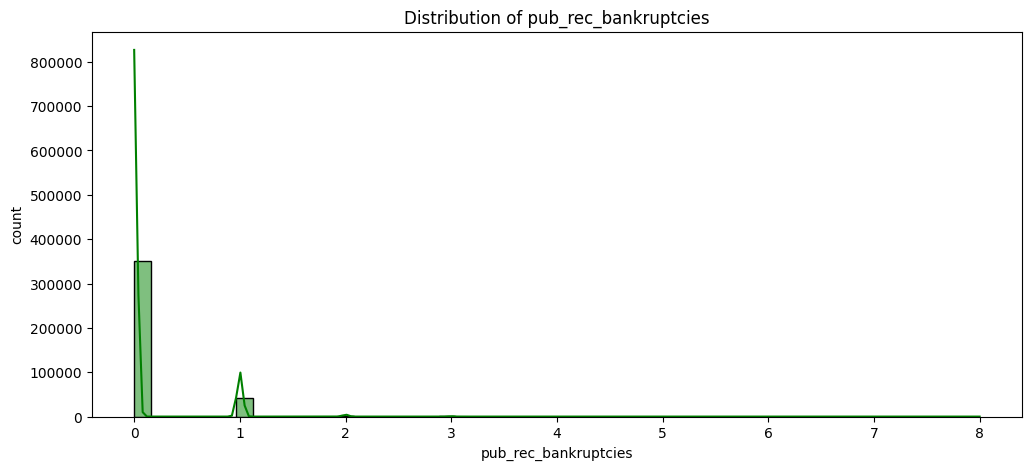

In [15]:
for i in n_column:
  plt.figure(figsize=(12,5))
  sns.histplot(data=loantap,x=i,kde=True,bins=50,color="green")
  plt.xlabel(i)
  plt.ylabel("count")
  plt.title("Distribution of "+i)
  plt.show()

In [16]:
custom_palette=sns.color_palette("husl", 7)

<ipython-input-17-9913e48f2fa0>:3: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


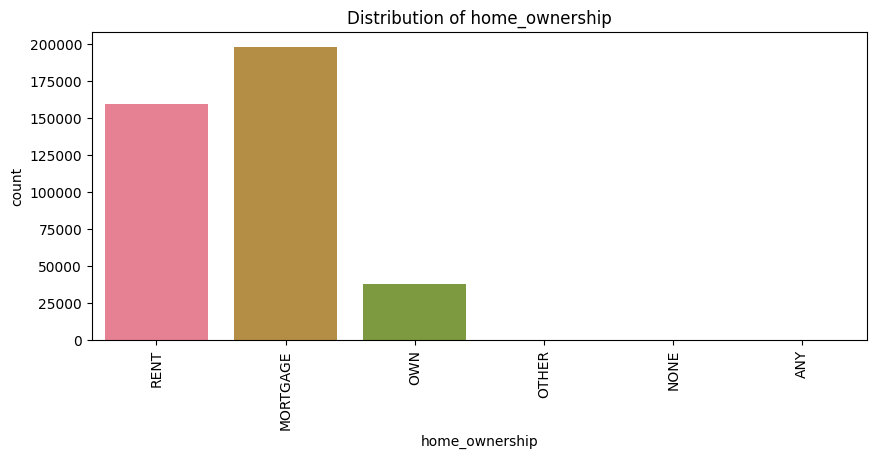

<ipython-input-17-9913e48f2fa0>:3: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


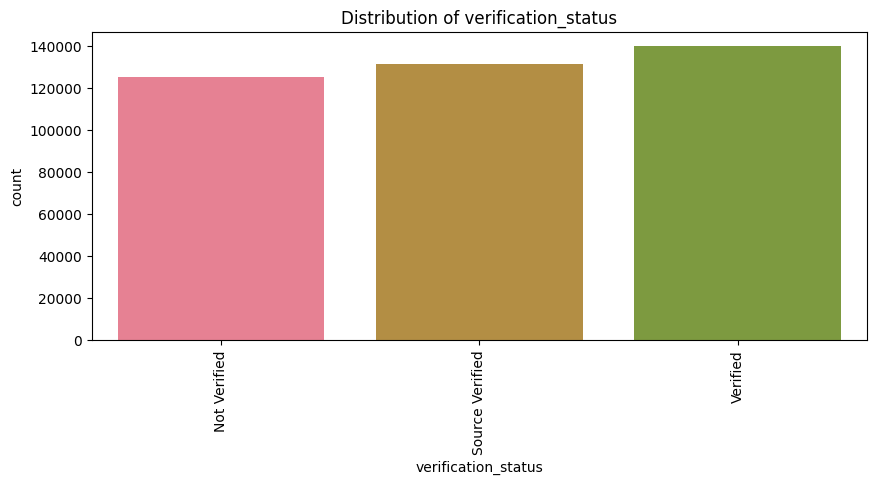

<ipython-input-17-9913e48f2fa0>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


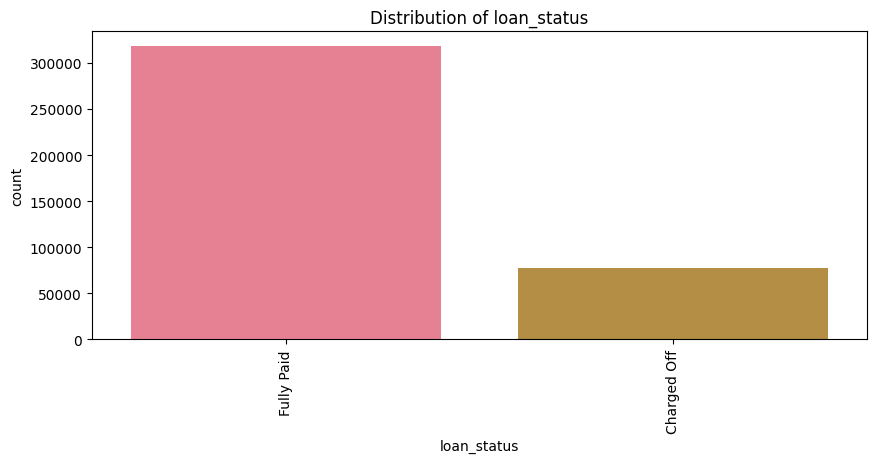

<ipython-input-17-9913e48f2fa0>:3: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


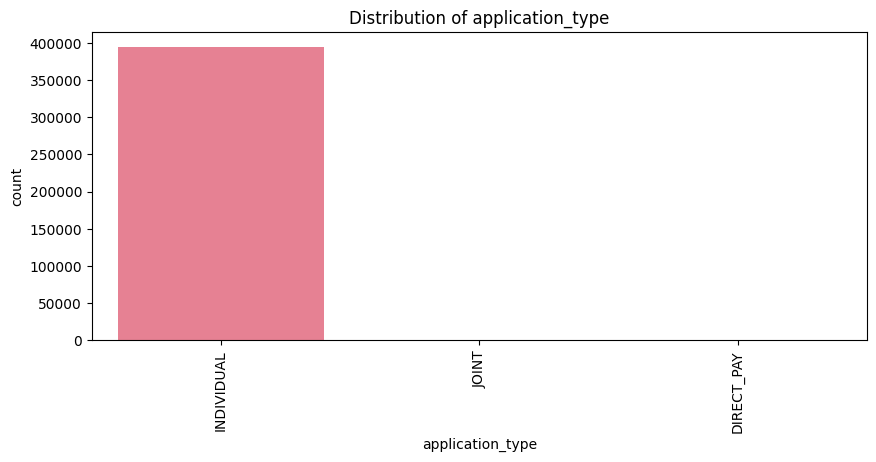

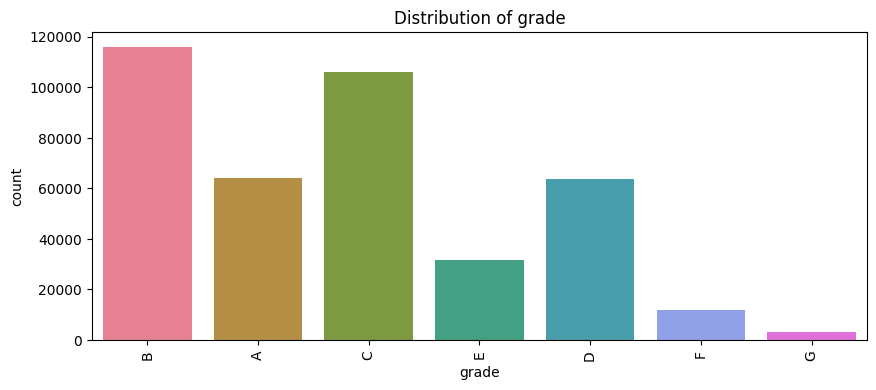

<ipython-input-17-9913e48f2fa0>:3: UserWarning: 
The palette list has fewer values (7) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


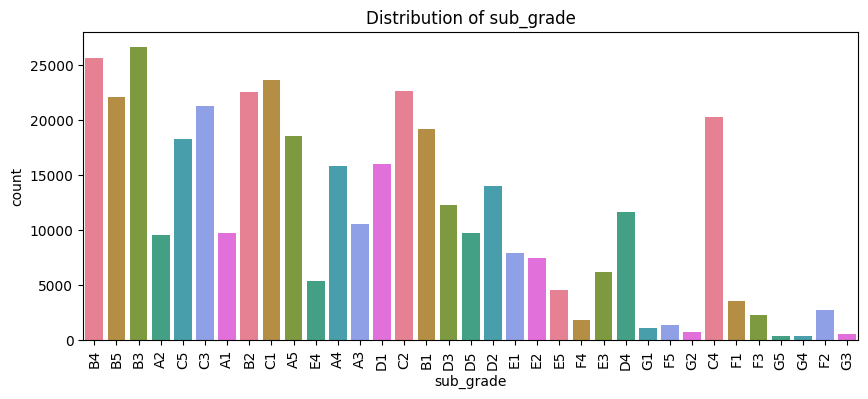

<ipython-input-17-9913e48f2fa0>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)


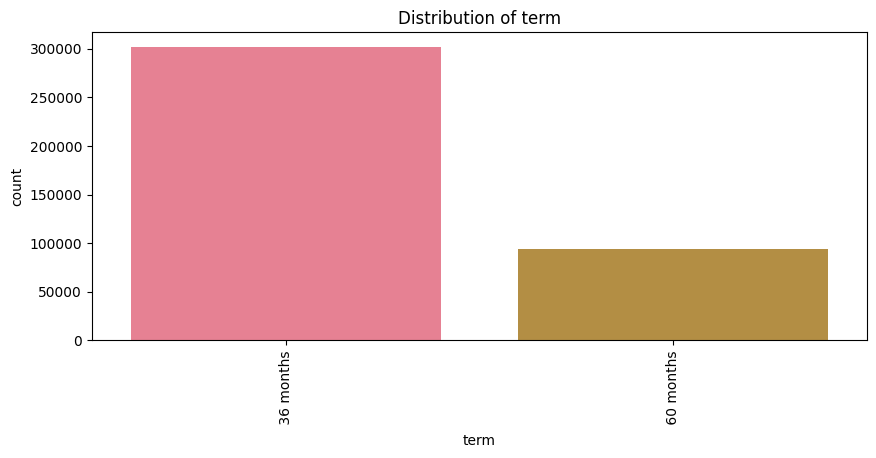

In [17]:
for i in n_categorical:
  plt.figure(figsize=(10,4))
  sns.countplot(data=loantap,x=i,palette=custom_palette,hue=i,legend=False)
  plt.xlabel(i)
  plt.ylabel("count")
  plt.title("Distribution of "+i)
  plt.xticks(rotation=90)
  plt.show()

# Bivarient Analysis

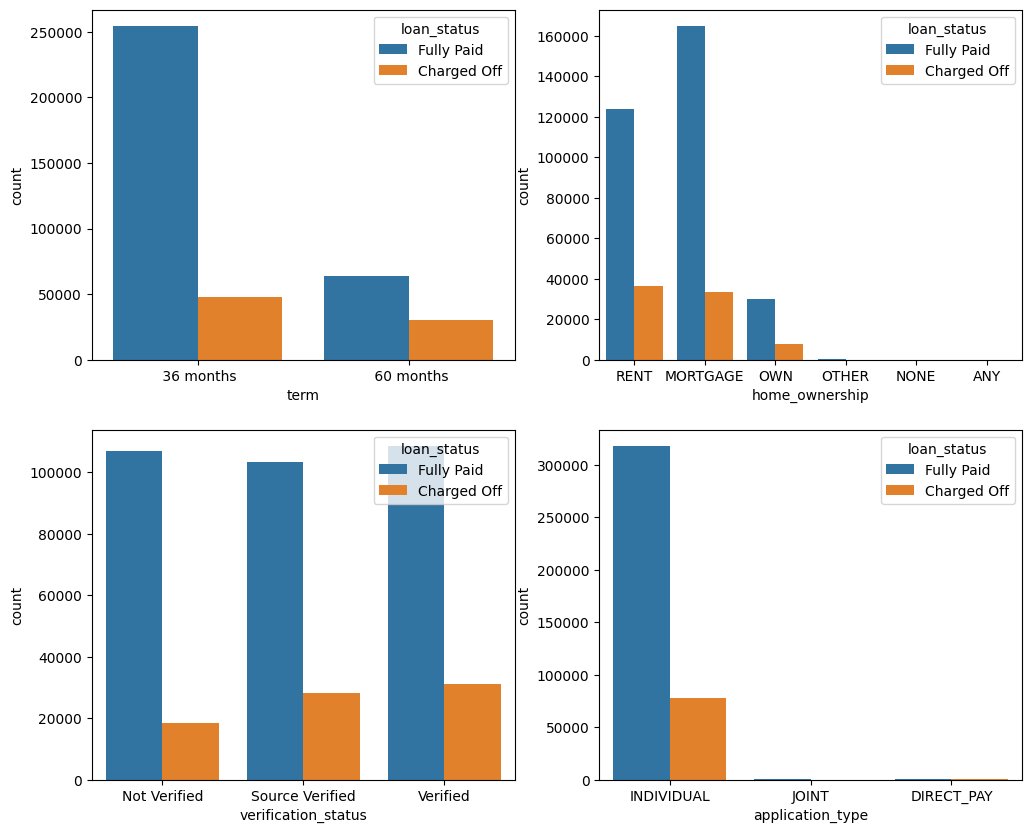

In [18]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(data=loantap,x='term',hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(data=loantap,x='home_ownership',hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(data=loantap,x='verification_status',hue='loan_status')

plt.subplot(2,2,4)
sns.countplot(data=loantap,x='application_type',hue='loan_status')
plt.show()

In [19]:
grade=sorted(loantap['grade'].unique())
grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<ipython-input-20-d58c52b94201>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


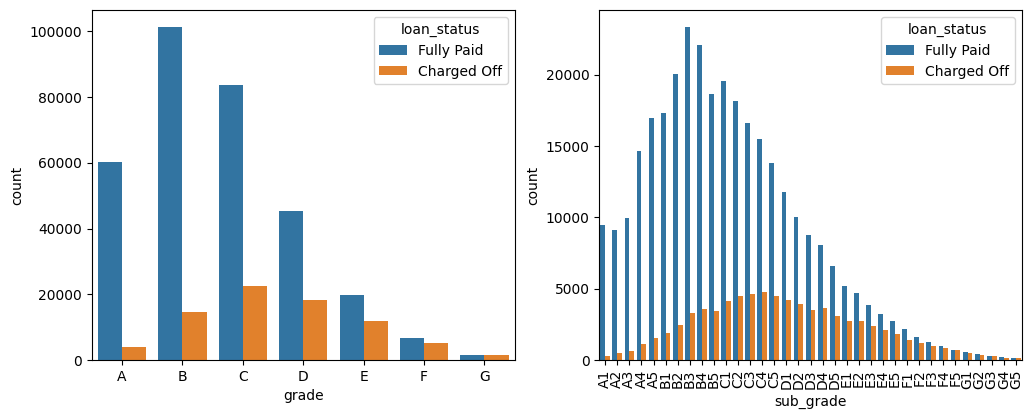

In [20]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
grade=sorted(loantap['grade'].unique())
sns.countplot(data=loantap,x='grade',hue='loan_status',order=grade)


plt.subplot(2,2,2)
grade=sorted(loantap['sub_grade'].unique())
g=sns.countplot(data=loantap,x='sub_grade',hue='loan_status',order=grade)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()



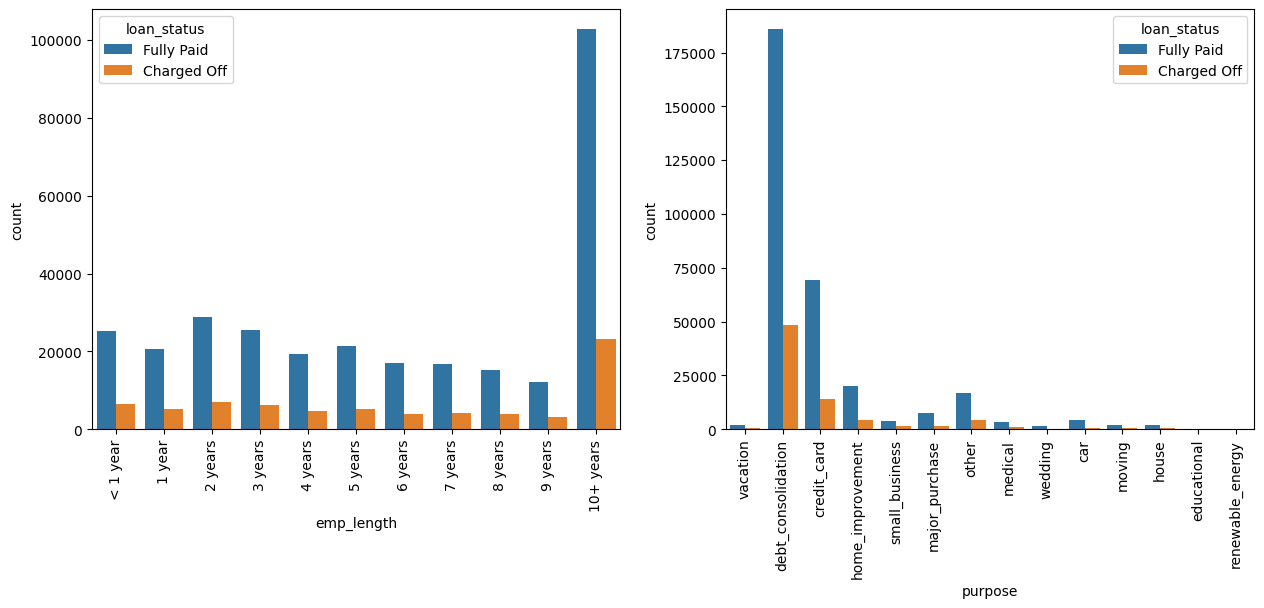

In [21]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(data=loantap,x='emp_length',hue='loan_status',order=order)
x=plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(data=loantap,x='purpose',hue='loan_status')
x=plt.xticks(rotation=90)

# **Insights**
**Loan term** : 36 month loan term has high completion rate.

**Borrower Situation**: Mortgages and rental are the most common borrwer of loan with high completion rate.

**Creditworthiness**: Borrowers with a credit grade of "B" and a subgrade of "B3" tend to have the highest repayment rates.

**Occupations**: Managers and teachers are the professions with the highest loan approval rates.

**Repayment**: Individuals employed for over 10 years demonstrate a strong track record of loan repayment.


# **Correlation Analysis**

In [22]:
loantap.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

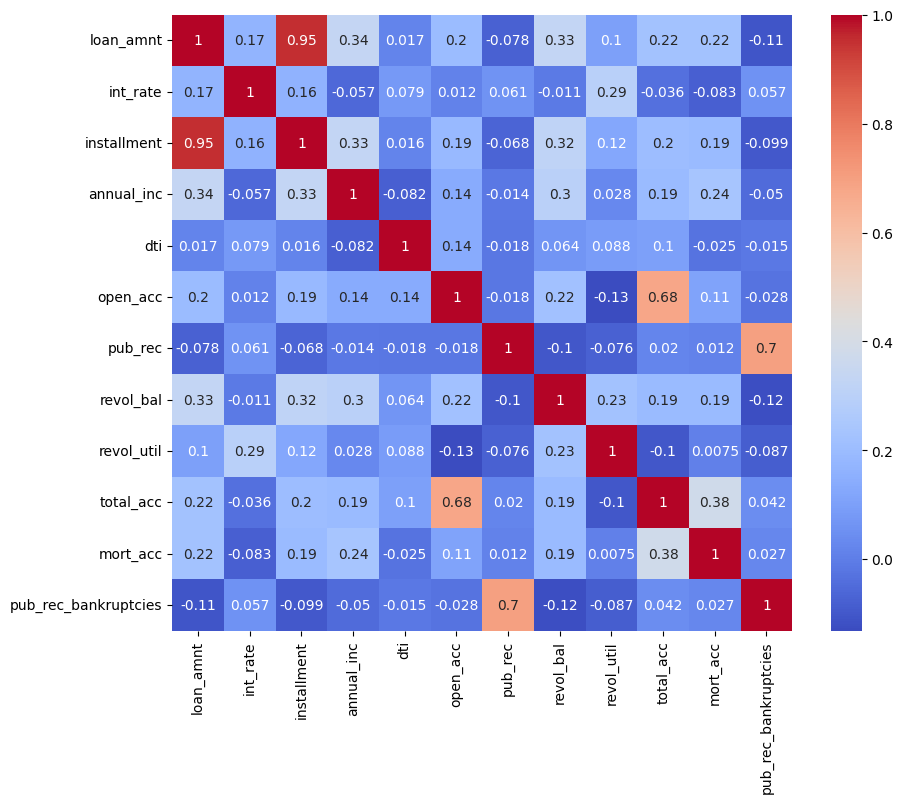

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(loantap.corr(numeric_only=True),annot=True,cmap='coolwarm')

# **Insigths**
Positive Correlation :
*   Loan amount and installment has obvious correlation around 0.95
*   Negative record of borrower credit profile(pub_rec) correlation with Backruptcy record of borrower(pub_rec_bankruptcies) correlation around 0.7
*   Open accunt and Pub_rec have strong correlation around 0.68









# **Data Processing using Feature Engineering**

In [24]:
def pub_rec(number):
  if number==0.0:
    return 0
  else:
    return 1
def mort_acc(number):
  if number==0.0:
    return 0
  elif number > 1.0:
    return 1
  else:
    return number
def pub_rec_bankruptcies(number):
  if number==0.0:
    return 0
  elif number > 1.0:
    return 1
  else:
    return number


In [25]:
loantap['pub_rec']=loantap['pub_rec'].apply(pub_rec)
loantap['mort_acc']=loantap['mort_acc'].apply(mort_acc)
loantap['pub_rec_bankruptcies']=loantap['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

In [26]:
loantap[['pub_rec','mort_acc','pub_rec_bankruptcies']].nunique()

pub_rec                 2
mort_acc                2
pub_rec_bankruptcies    2
dtype: int64

# **Duplicate checks**

In [27]:
#duplicate check
loantap.duplicated().sum()

0

In [28]:
#Missing value
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [29]:
numeric_columns=loantap.select_dtypes('float64','integer')

total_acc_avg=numeric_columns.groupby('total_acc')['mort_acc'].mean()
# filling mort_acc null value with mean
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

loantap['mort_acc']=loantap.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']) ,axis=1)

In [30]:
# mort_acc null value get filled
loantap.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [31]:
loantap.shape

(396030, 27)

In [32]:
#Dropping remaining null values
loantap.dropna(inplace=True)
loantap.shape

(370621, 27)

# **Outlier Detection**

In [33]:
loantap.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [34]:
def box_plot(column):
  if column in n_column:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=loantap,x=column)
    plt.title("Box Plot of "+column)
    plt.show()
  else:
    print("Not a numeric column")


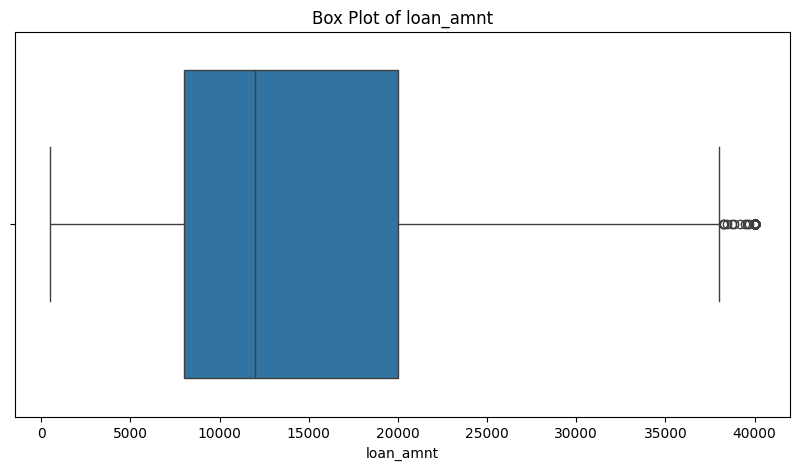

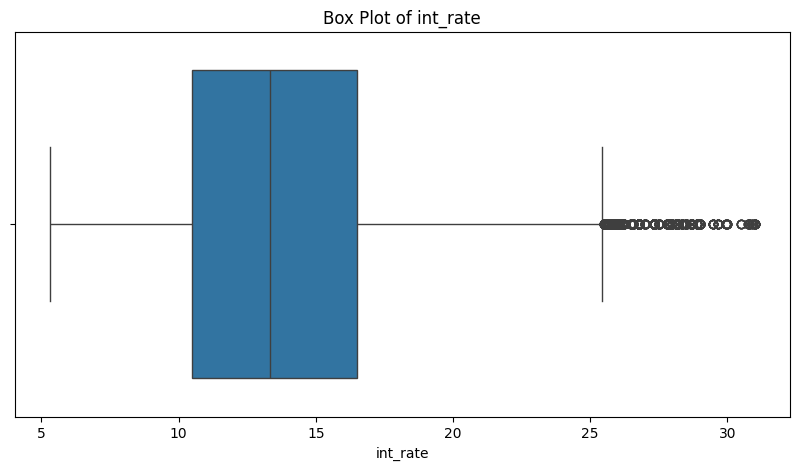

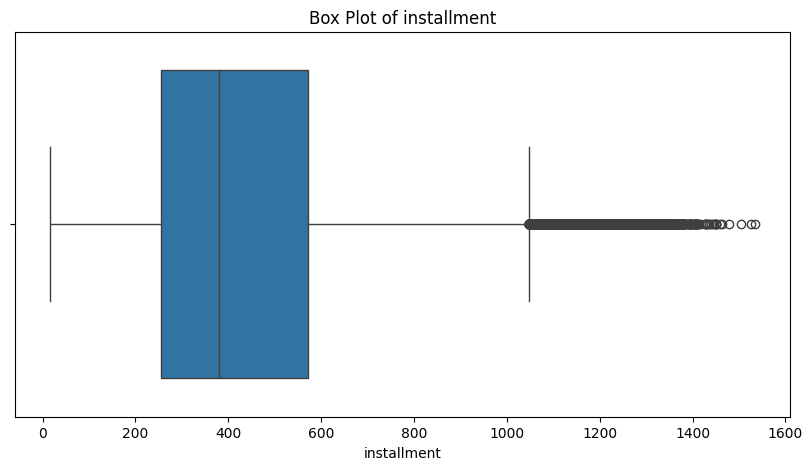

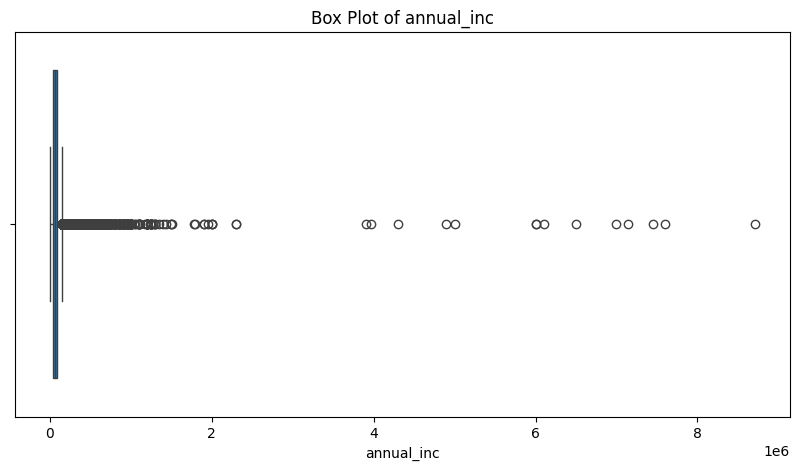

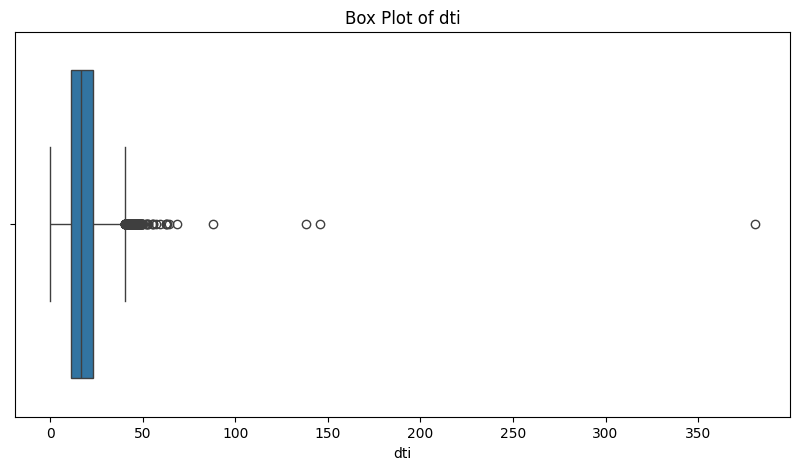

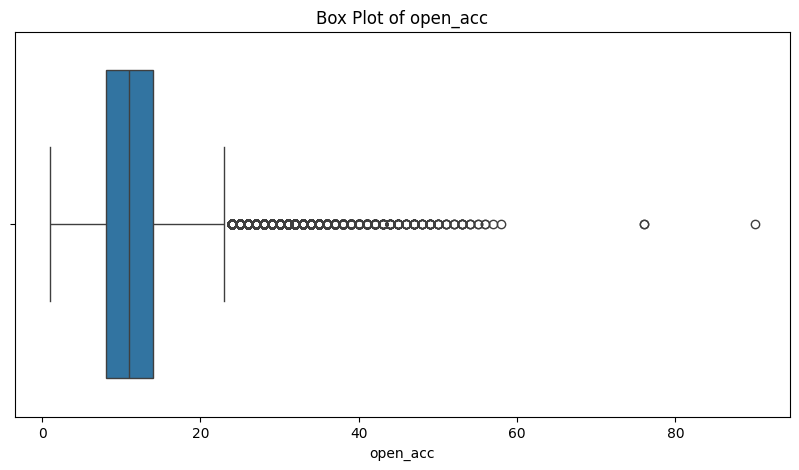

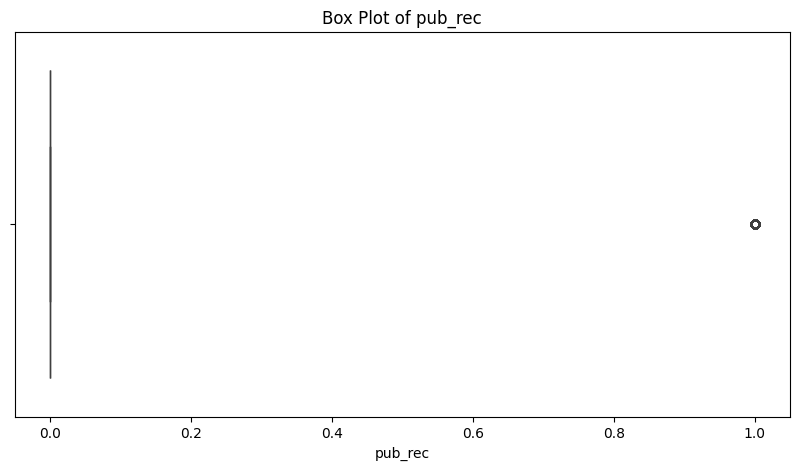

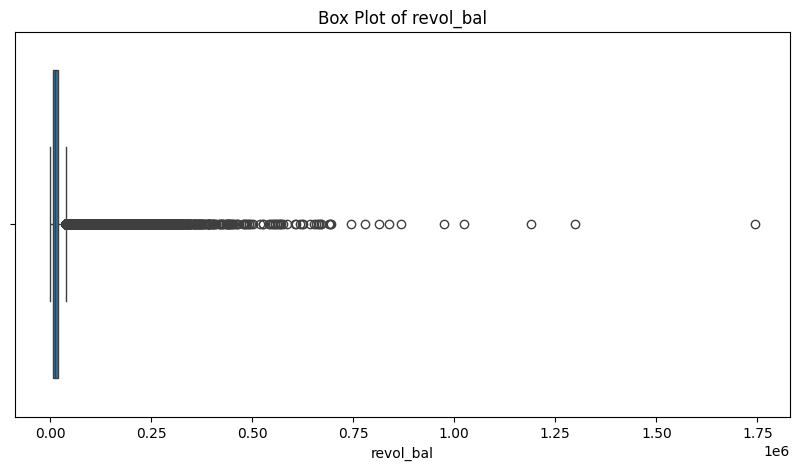

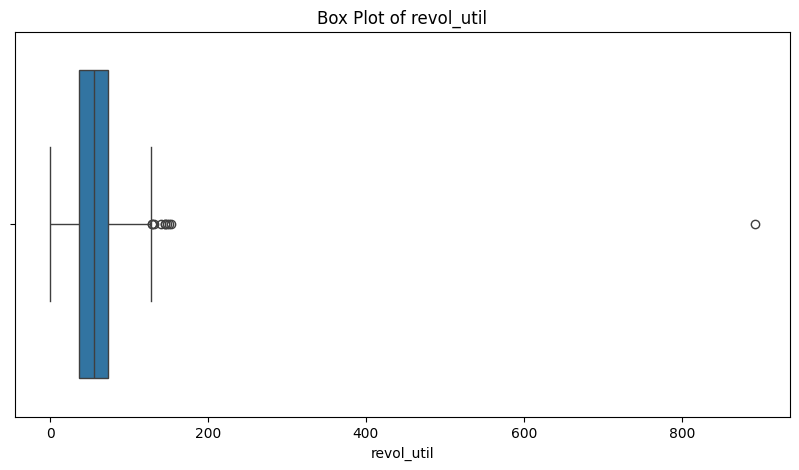

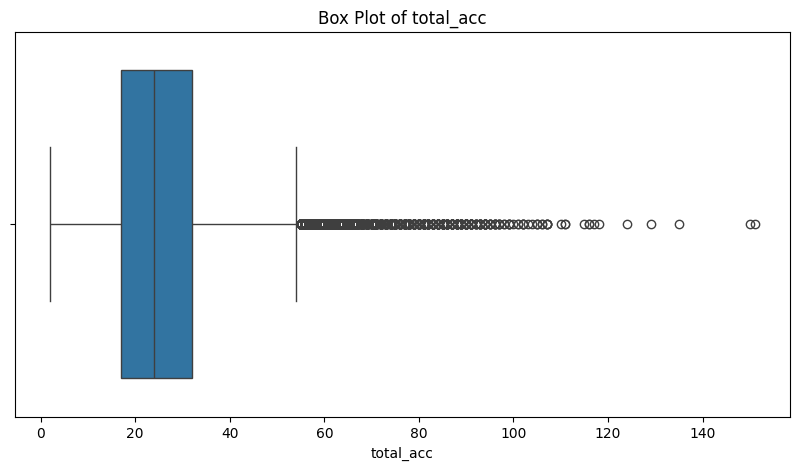

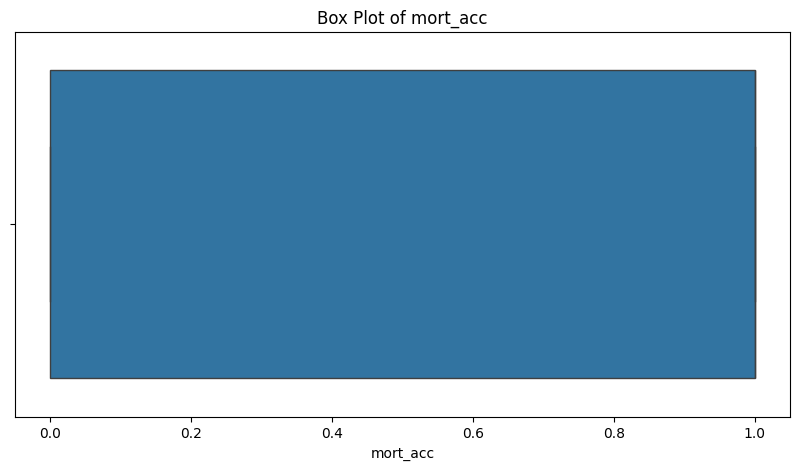

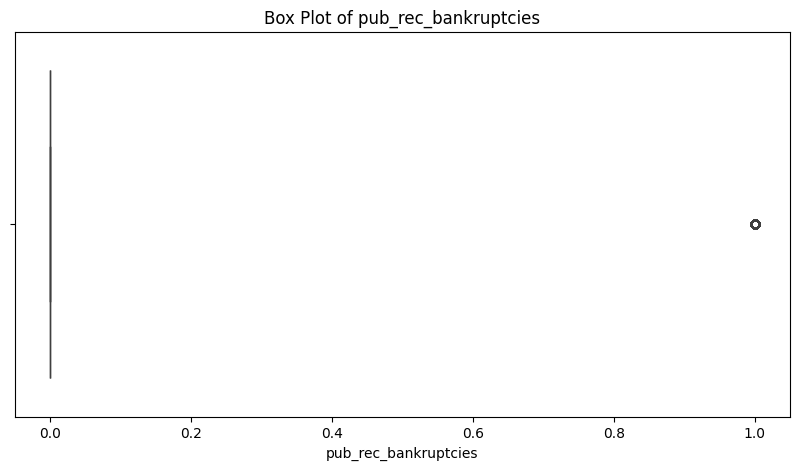

In [35]:
for col in n_column:
  box_plot(col)

In [36]:
#outlier treatment
for col in n_column:
  if col in n_column:
    mean=loantap[col].mean()
    std=loantap[col].std()
    lower_limit=mean-3*std
    upper_limit=mean+3*std
    loantap[col]=np.where(loantap[col]<lower_limit,lower_limit,loantap[col])
    loantap[col]=np.where(loantap[col]>upper_limit,upper_limit,loantap[col])

In [37]:
loantap.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,370621.0,14249.873857,8356.840623,500.00,8000.00,12000.00,20000.00,39323.539780
int_rate,370621.0,13.635209,4.464462,5.32,10.49,13.33,16.49,27.052315
installment,370621.0,434.494068,248.037407,16.08,254.17,379.19,571.56,1186.295034
annual_inc,370621.0,73979.768696,40738.540037,4000.00,46000.00,65000.00,90000.00,261458.642106
dti,370621.0,17.333573,8.068324,0.00,11.32,16.90,22.93,41.648810
open_acc,370621.0,11.341734,4.940682,1.00,8.00,11.00,14.00,26.832263
pub_rec,370621.0,0.141263,0.348293,0.00,0.00,0.00,0.00,1.000000
revol_bal,370621.0,15204.975349,13720.704864,0.00,6115.00,11303.00,19767.00,77567.423607
revol_util,370621.0,53.988800,24.350186,0.00,36.10,55.00,73.00,127.161253
total_acc,370621.0,25.460714,11.669103,2.00,17.00,24.00,32.00,61.178613


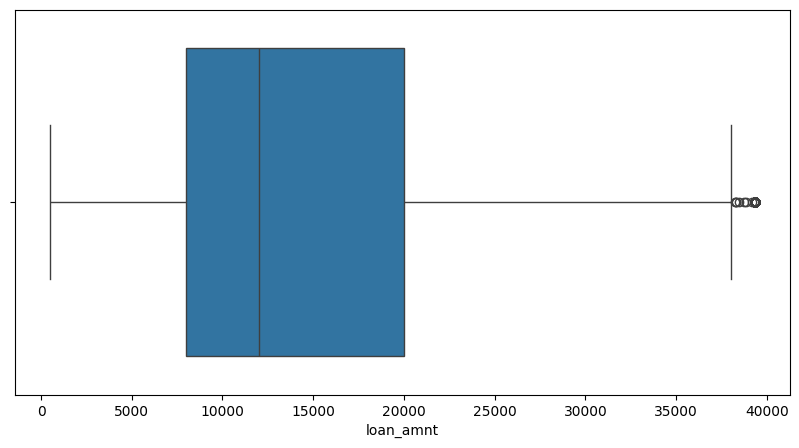

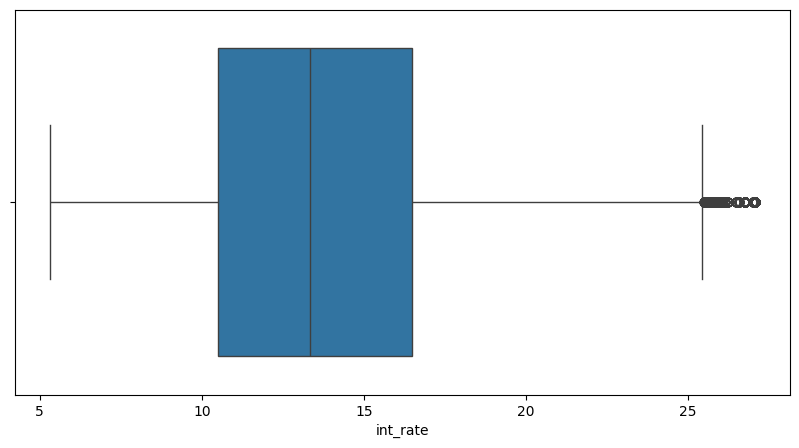

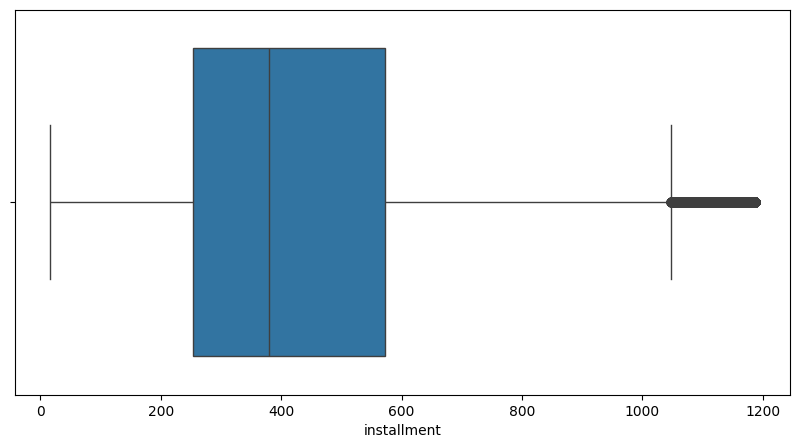

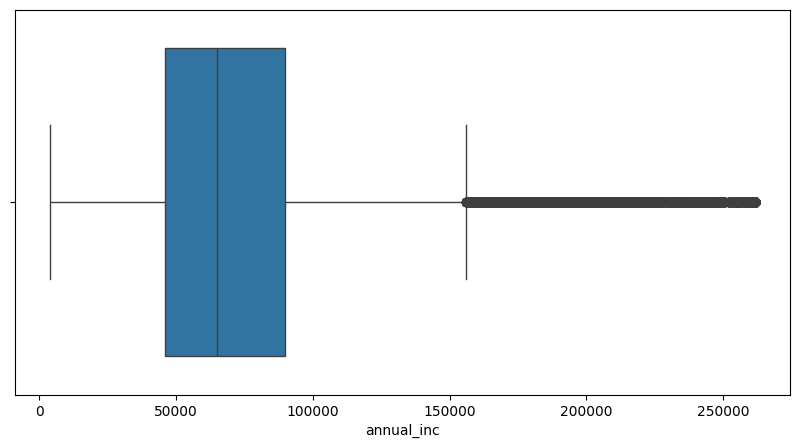

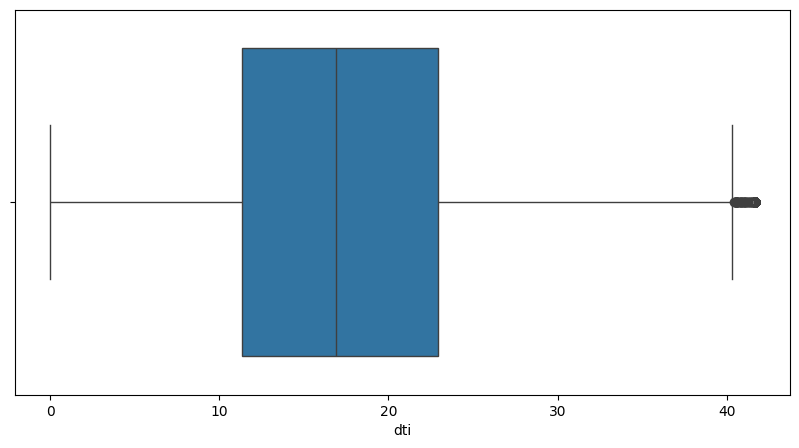

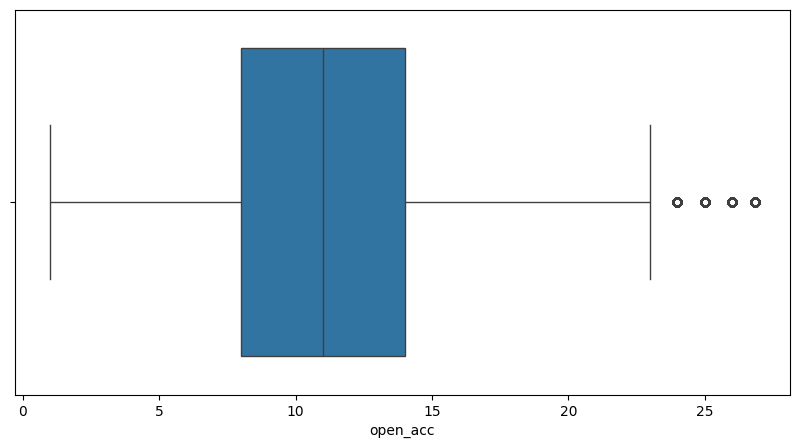

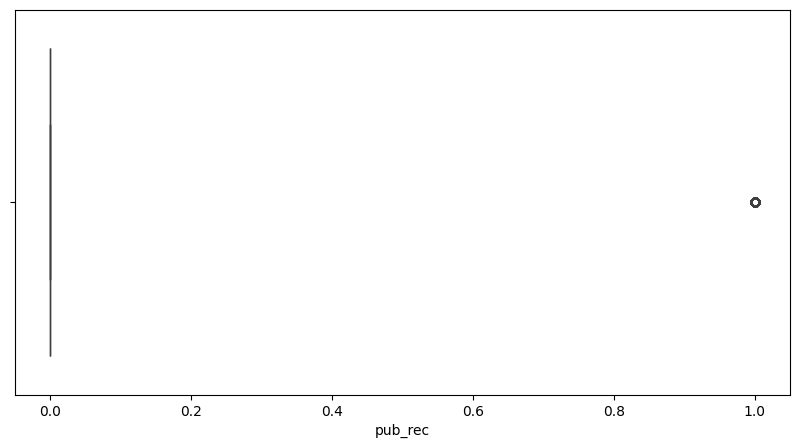

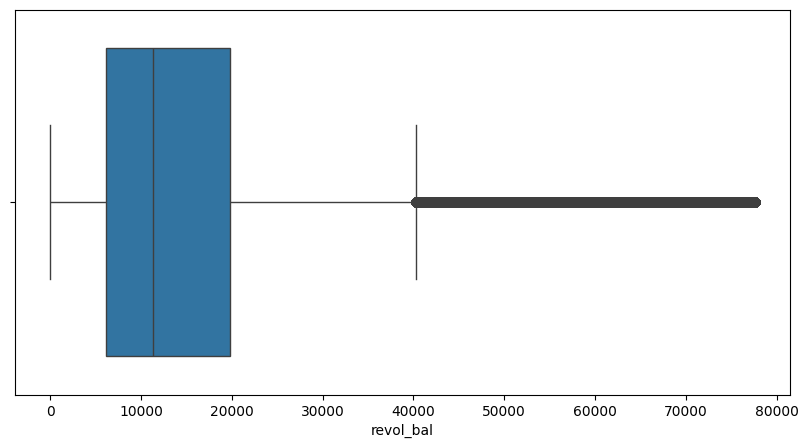

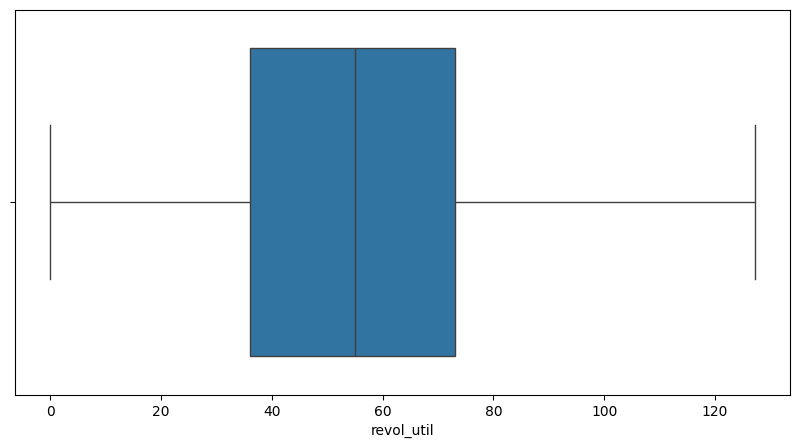

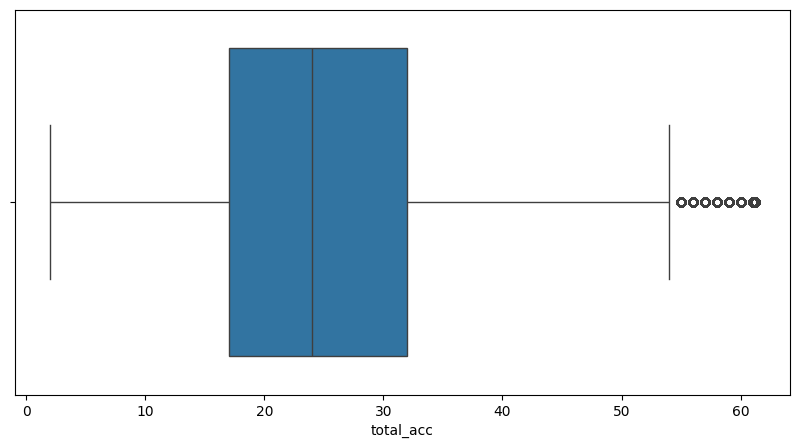

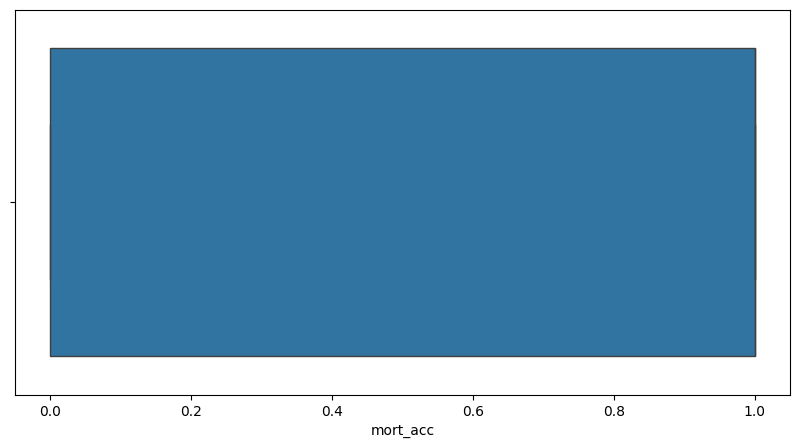

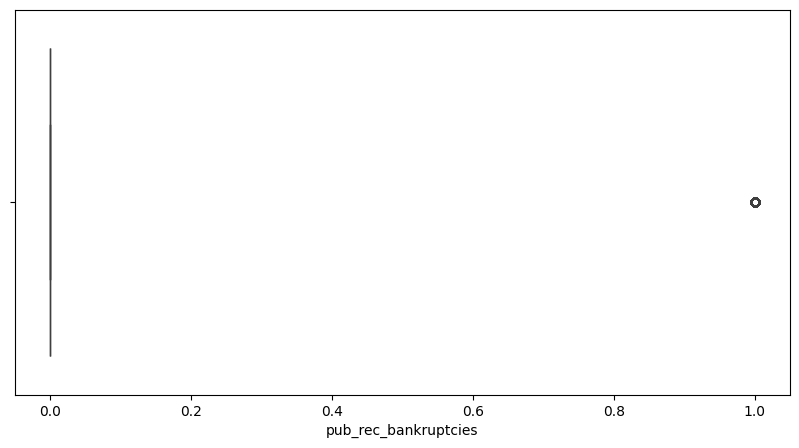

In [38]:
def box_plot(column):
  if column in n_column:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=loantap,x=column)

for col in n_column:
  box_plot(col)

In [39]:
term_values = {' 36 months': 36, ' 60 months': 60}

loantap['term'] = loantap['term'].map(term_values)

loantap['loan_status'] = loantap['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

list_status = {'w': 0, 'f': 1}

loantap['initial_list_status'] = loantap['initial_list_status'].map(list_status)

loantap['zip_code'] = loantap['address'].apply(lambda x: x[-5:])

loantap['zip_code'].value_counts(normalize=True) * 100

zip_code
70466    14.384506
30723    14.273341
22690    14.261739
48052    14.126561
00813    11.623195
29597    11.544678
05113    11.517966
11650     2.773453
93700     2.769406
86630     2.725156
Name: proportion, dtype: float64

In [50]:
# Dropping of unnecessary columns
unnessary_column=['issue_d', 'emp_title', 'title', 'sub_grade','address', 'earliest_cr_line', 'emp_length']
loantap.drop(unnessary_column,axis=1,inplace=True)
loantap.shape

(370621, 21)

In [51]:
dummies=['purpose','zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
data=pd.get_dummies(loantap,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data.shape
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False


In [52]:
from sklearn.model_selection import train_test_split
x=data.drop('loan_status',axis=1)
y=data['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(259434, 51)
(111187, 51)
(259434,)
(111187,)


# **Model Building**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_recall_curve,auc
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from  sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)

In [59]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [60]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [78]:
y_pred=logreg.predict(x_test)
logreg_score=accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg_score))

Accuracy of logistic regression classifier on test set: 0.891


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     89717
           1       0.95      0.46      0.62     21470

    accuracy                           0.89    111187
   macro avg       0.92      0.73      0.78    111187
weighted avg       0.90      0.89      0.87    111187



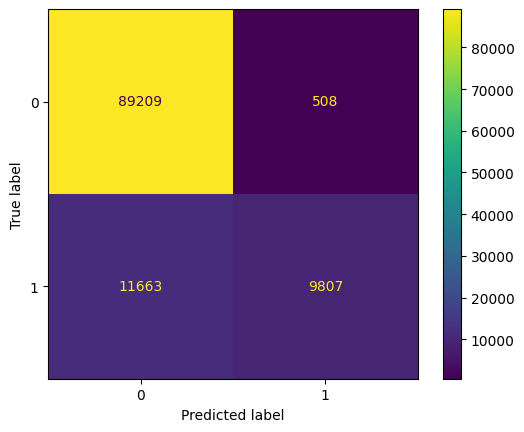

In [82]:
# Plot Confusion matrix
confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay.from_estimator(logreg,x_test,y_test)

# **ROC Curve -**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*  True Positive Rate
*  False Positive Rate

***True Positive Rate ***(TPR) is a synonym for recall and is therefore defined as follows:

TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

# AUC (Area under the ROC Curve)

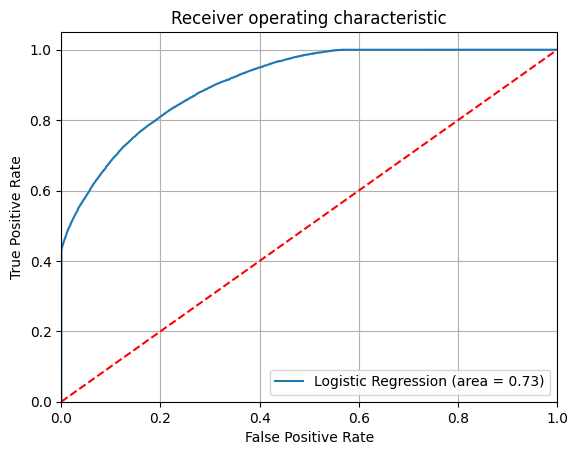

In [86]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt .ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Insights:
1.   ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.
2. There is still room for some model improvement
3. By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.


# **Precision-Recall Curve**

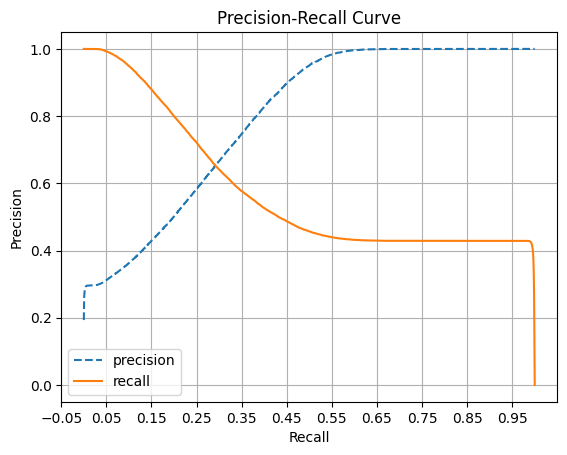

In [96]:
precision,recall,thresholds=precision_recall_curve(y_test,logreg.predict_proba(x_test)[:,1])
threshold_boundary=thresholds.shape[0]

#plot precision
plt.plot(thresholds,precision[0:threshold_boundary],linestyle='--',label='precision')

#plot recall
plt.plot(thresholds,recall[0:threshold_boundary],label='recall')
start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()

# **Insights**

1. Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
2. Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.

# **Actional Insights and Recommendations**

1. 80% of the customers have paid the loan fully.
2. 20% of the customers are the defaulters.
3. The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.
4. Model achieves the 94% f1-score for the negative class (Fully Paid).
5. Model achieves the 62% f1-score for the positive class (Charged off).
6. Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for unseen data
7. By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
8. ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still room for improvement.
9. The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.
10. After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
11. Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance